In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# in this trading rule if the 20 day moving average is over 50 day moving average is over 200 day moving average then buy in the reverse case sell
# the data is already scaled for 200 day moving average
def trading_rule_20_50_200(df):
	# initialise the new action column
	df['RuleAction'] = 'None'

	df.loc[((df['mav20'] > df['mav50']) & (df['mav50'] > 1)), 'RuleAction'] = 'Buy'
	df.loc[((df['mav20'] < df['mav50']) & (df['mav50'] < 1)), 'RuleAction'] = 'Sell'

	return df


csvfilename = 'train_50.csv'

data = pd.read_csv('sampledata/'+ csvfilename)

data = trading_rule_20_50_200(data)

ytest = np.array(pd.get_dummies(data.Action))
predict_valid = np.array(pd.get_dummies(data.RuleAction))

In [2]:
# compute the type 1 and type 2 errors
def prediction_accuracy(ytest, predict_val):

    # rows belong to predicton
    # columns to test values
    # order BUY, NONE , SELL
    accuracy_mat = np.zeros([3,3], dtype = float)
    for i in range(ytest.shape[1]):
        for j in range(predict_val.shape[1]):
            accuracy_mat[i,j] = sum(predict_val[(predict_val[:,j] *  ytest[:,i] > 0),j])
    allobs = sum(map(sum, accuracy_mat))
    accuracy_mat = np.divide(accuracy_mat, allobs)*100
    accuracy_mat = pd.DataFrame(accuracy_mat, columns = ['Buy', 'None', 'Sell'], index = ['Buy', 'None', 'Sell'])
    return accuracy_mat

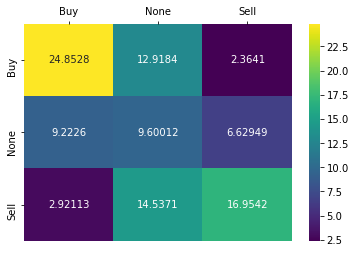

In [3]:
df = prediction_accuracy(ytest, predict_valid)

ax = sns.heatmap(df, annot=True, fmt="g", cmap='viridis')
ax.xaxis.set_ticks_position('top')

# now save the heatmap
ax.figure.savefig('figures/trading_rule_50_50.png')